# 적분

적분(integral)은 미분과 반대되는 개념이다. 적분에는 부정적분(indefinite integral)과 정적분(definite integral)이 있다.

# 부정적분

**부정적분(indefinite integral)은 정확하게 미분과 반대되는 개념, 즉 반-미분(anti-derivative)**이다. 함수 f(x)가 어떤 함수를 미분하여 나온 결과인 도함수라고 가정하고 이 도함수 f(x)에 대한 미분되기 전의 원래의 함수를 찾는 과정(integration), 또는 그 결과(integral)를 말한다.

부정적분으로 찾은 원래의 함수를 표기할 때는 도함수를 대문자화(capitalization)하여 표기할 때도 있지만 다음처럼 ∫ 기호(integral이라고 읽는다.)로 나타내는 것이 일반적이다. 여기에서 도함수가 f(x)이므로 미분하기 전의 함수를 F(x) 또는 ∫f(x)dx로 쓴다. dx는 x라는 변수로 적분했다는 것을 나타내는 기호로 편미분에 대응하는 적분을 표기할 때 필요하다.

${dF(x)\over dx}=f(x)↔F(x)=∫f(x)dx+C$

C는 상수항을 뜻한다. 상수항은 미분하면 0이 되므로 부정적분은 무한 개의 해가 있다. C는 너무 당연하므로 생략하고 쓰는 경우도 있다.

# 정적분

정적분(definite integral)은 독립변수 x가 어떤 구간 [a,b] 사이일 때 그 구간에서 함수 f(x)의 값과 수평선(x 축)이 이루는 면적을 구하는 행위(integration) 혹은 그 값(integral)을 말한다. 

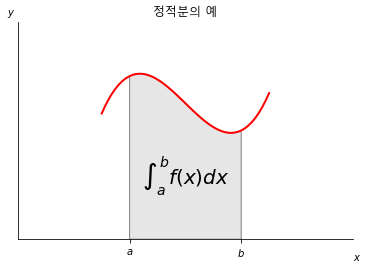

In [3]:
from matplotlib.patches import Polygon
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=10, family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6


a, b = 0, 2
x = np.linspace(a - 0.5, b + 0.5, 50)
y = f(x)

ax = plt.subplot(111)
plt.title("정적분의 예")
plt.plot(x, y, 'r', linewidth=2)
plt.ylim(bottom=0)
ix = np.linspace(a, b)
iy = f(ix)
verts = [(a, 0)] + list(zip(ix, iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.5 * (a + b), 0.2 * (f(a) + f(b)), r"$\int_a^b f(x)dx$",
         horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.05, '$x$')
plt.figtext(0.1, 0.9, '$y$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([])
ax.set_xlim(-2, 4)
ax.set_ylim(0, 8)
plt.show()

정적분은 심파이 등으로 부정적분을 한 뒤 미적분학의 기본 정리를 사용하여 푸는 방법과 원래 함수의 면적 부분을 실제로 잘게 쪼개어 면적을 근사하게 구하는 수치적분(numerical integration) 이렇게 두가지 방법으로 구할 수 있다.

In [5]:
import sympy

x, y = sympy.symbols('x y')
f = x ** 3 - 3 * x ** 2 + x + 6
f

x**3 - 3*x**2 + x + 6

In [6]:
# 부정 적분
F = sympy.integrate(f)
F

x**4/4 - x**3 + x**2/2 + 6*x

구해진 미분하기 전의 함수에 정적분 구간을 넣어 값을 계산한다. 심볼릭 함수의 변수에 실제 숫자를 넣어서 함수의 값을 계산하려면 subs(), evalf() 메서드를 사용한다.

In [7]:
(F.subs(x, 2) - F.subs(x, 0)).evalf()

10.0000000000000

# 수치적분

**수치적분(numerical integration)**은 함수를 아주 작은 구간으로 나누어 실제 면적을 계산함으로써 정적분의 값을 구하는 방법이다. Scipy의 integrate 서브패키지의 quad 명령으로 수치적분을 할 수 있다.

In [12]:
from scipy.integrate import quad

def f(x):
    return x ** 3 - 3 * x ** 2 + x + 6

quad(f, 0, 2)  # 정적분 (수치적분)

(10.0, 1.1102230246251565e-13)

# 다변수 정적분

입력 변수가 2개인 2차원 함수 f(x,y)의 경우에는 정적분을 다양한 방법으로 정의할 수 있다.

두 변수로 모두 적분하는 것은 2차원 평면에서 주어진 사각형 영역 아래의 부피를 구하는 것과 같다.

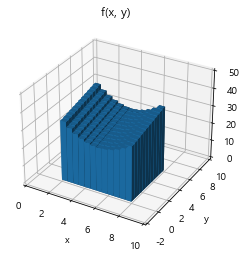

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
_x = np.arange(12) / 2 + 2
_y = np.arange(12) / 2
X, Y = np.meshgrid(_x, _y)
x, y = X.ravel(), Y.ravel()
z = x * x - 10 * x + y + 50
z0 = np.zeros_like(z)
ax.bar3d(x, y, z0, 0.48, 0.48, z)
ax.set_xlim(0, 10)
ax.set_ylim(-2, 10)
ax.set_zlim(0, 50)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.title("f(x, y)")
plt.show()